# Sparse-Adversarial-Attack

In [ ]:
!pip install -r requirements.txt

In [ ]:
!rm -rf ../images/.ipynb_checkpoints/

In [5]:
%cd Tianchi04

/home/jupyter/ae-attack-pipeline/Tianchi04


In [ ]:
!python attack_3.py --max_iter=150

In [ ]:
# Copy and move newly generated files from 'final' folder to 'select1000_new_p'
import os

final_files = os.listdir("./final")
final_files.remove(".ipynb_checkpoints")

for file in final_files:
    file_path = "final/" + file
    out_dir = "select1000_new_p/" + file
    %cp -av "{file_path}" "{out_dir}"

In [14]:
# Run when eval.py gets following error:
#   IsADirectoryError: [Errno 21] Is a directory: './select1000_new/.ipynb_checkpoints'
!rm -rf ./select1000_new_p/.ipynb_checkpoints/
!rm -rf ./select1000_new/.ipynb_checkpoints/

In [ ]:
!python eval.py

# Faster-RCNN test

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import os
import mmcv
import numpy as np

images = os.listdir('select1000_new/')
#images = ['1.jpg']
if '.ipynb_checkpoints' in images:
  # Removing common error
  images.remove('.ipynb_checkpoints')

# Choose to use a config and initialize the detector
config = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# Setup a checkpoint file to load
checkpoint = './checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

for image in images:
    # Use the detector to do inference
    img0 = 'select1000_new/'+image     # Benign
    img1 = 'select1000_new_p/'+image   # Adversarial
    result0 = inference_detector(model, img0)
    result1 = inference_detector(model, img1)
    #meta = [{'filename': '../images/6.png', 'ori_filename': '../images/6.png', 'ori_shape': (500, 500, 3), 'img_shape': (800, 800, 3), 'pad_shape': (800, 800, 3), 'scale_factor': np.array([1.6, 1.6, 1.6, 1.6], dtype=np.float32), 'flip': False, 'flip_direction': None, 'img_norm_cfg': {'mean': np.array([123.675, 116.28 , 103.53 ], dtype=np.float32), 'std': np.array([58.395, 57.12 , 57.375], dtype=np.float32), 'to_rgb': True}}]
    #result1, label = model(return_loss=False, rescale=True, img=img1, img_metas=meta)

    show_result_pyplot(model, img0, result0, score_thr=0.5, title="Benign")
    show_result_pyplot(model, img1, result1, score_thr=0.5, title="Adversarial")

# YOLOv4 test

In [70]:
import torch
from torchvision import transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from utils.utils import *
import json

import numpy as np
import os
from tool.darknet2pytorch import *
from infer import infer
from tqdm import tqdm
from skimage import measure


selected_path = './select1000_new_p'
files = os.listdir(selected_path)
files.sort()
files = ["3.jpeg"]
print(files)

cfgfile = "checkpoints/yolov4.cfg"
weightfile = "checkpoints/yolov4.weights"
darknet_model = Darknet(cfgfile)
darknet_model.load_weights(weightfile)
darknet_model = darknet_model.eval().cuda()

for img_name_index in tqdm(range(len(files))):
  img_name = files[img_name_index]

  img_path1 = os.path.join(selected_path, img_name)
  img1 = Image.open(img_path1).convert('RGB')


  resize_small = transforms.Compose([
      transforms.Resize((608, 608)),
  ])
  #img0 = resize_small(img0)
  img1 = resize_small(img1)

  # --------------------BOX score
  boxes1 = do_detect(darknet_model, img1, 0.5, 0.4, True)
  print("boxes1")
  print(boxes1)

# TODO: Plot the YOLOv4 detection

['3.jpeg']
convolution havn't activate linear
convolution havn't activate linear
convolution havn't activate linear


100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

boxes1
[[0.7503393308112496, 0.48561922735289526, 0.3392335513704701, 0.2918040536736187, 0.97512984, 0.9990301, 2], [0.9651694736982647, 0.4836887191785009, 0.0685895726476845, 0.23051454440543526, 0.9650091, 0.9999683, 2], [0.45627671166470174, 0.4565121186406989, 0.2657462451606989, 0.503198552582609, 0.95275486, 0.99999607, 0], [0.09180355699438798, 0.39072853326797485, 0.18494939137446254, 0.4892964072917637, 0.89397335, 0.9978108, 7], [0.34025577965535614, 0.3241395816991204, 0.2760306545778325, 0.450896259985472, 0.74515593, 0.9996319, 7]]


In [ ]:
from models import *
import cv2
import numpy as np
import torch

model1 = Yolov4(yolov4conv137weight=None, n_classes=80, inference=True)
pretrained_dict = torch.load('checkpoints/yolov4.pth', map_location=torch.device('cuda'))
model1.load_state_dict(pretrained_dict)
model1.eval().cuda()

img_pil = cv2.imread('select1000_new/1.jpg')
img_pil = cv2.cvtColor(img_pil, cv2.COLOR_BGR2RGB)
img_pil = np.transpose(img_pil, (2,0,1))
img = torch.from_numpy(img_pil/255.).float()
img = img.unsqueeze(0).cuda()

image = F.interpolate(img, size=(608, 608), mode='bilinear', align_corners=True)
out1 = model1(image)
print(out1)

In [6]:
import cv2
import torch
from models import Yolov4
#from utils.utils import do_detect
from tool.torch_utils import do_detect  # This gives all classes '0'
from tool.utils import plot_boxes_cv2, load_class_names


model = Yolov4(yolov4conv137weight=None, n_classes=80, inference=True)
pretrained_dict = torch.load('checkpoints/yolov4.pth', map_location=torch.device('cuda'))
model.load_state_dict(pretrained_dict)
model.eval().cuda()

image_name = "1.jpg"
image_name = "2.png"
image_name = "3.jpeg"
image = "select1000_new/" + image_name
width = 512
height = 512

img = cv2.imread(image)
sized = cv2.resize(img, (width, height))
sized = cv2.cvtColor(sized, cv2.COLOR_BGR2RGB)
boxes = do_detect(model, sized, 0.4, 0.6, True) 

namesfile = 'data/coco.names'
class_names = load_class_names(namesfile)
print(boxes)
result = plot_boxes_cv2(img, boxes[0], 'predictions/{}'.format(image_name), class_names)

-----------------------------------
           Preprocess : 0.001242
      Model Inference : 0.148690
-----------------------------------
-----------------------------------
       max and argmax : 0.000475
                  nms : 0.000578
Post processing total : 0.001053
-----------------------------------
[[[0.5590717, 0.33550578, 0.9194704, 0.6277044, 0.9933717, 0.9933717, 0], [0.9321898, 0.34907264, 0.999877, 0.59880435, 0.9777499, 0.9777499, 0], [-0.00030101836, 0.08739653, 0.18333948, 0.64376295, 0.9731363, 0.9731363, 0], [0.32372278, 0.20512706, 0.596239, 0.7130558, 0.9594698, 0.9594698, 0], [0.20134296, 0.107516766, 0.5031272, 0.54095256, 0.93134433, 0.93134433, 0], [0.84413415, 0.38439947, 0.95619184, 0.5489074, 0.8494763, 0.8494763, 0], [0.16050789, 0.3371538, 0.22560807, 0.5224353, 0.7434002, 0.7434002, 0], [0.40848905, 0.5452026, 0.5274235, 0.80266505, 0.7190087, 0.7190087, 0], [0.5211524, 0.08248466, 0.54805493, 0.1536578, 0.5565113, 0.5565113, 0], [0.8460468, 0.3667542, 0

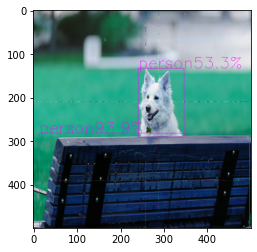

In [4]:
# Display image
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(result) 
plt.show()